In [10]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

Stock name: HD
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


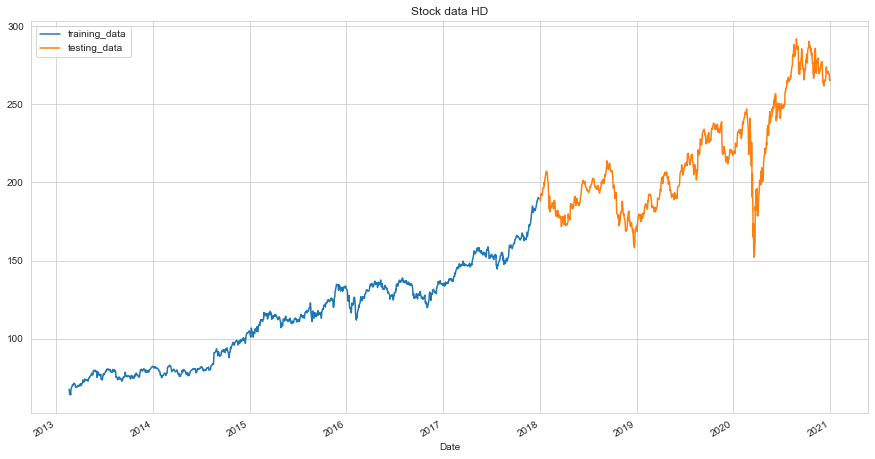

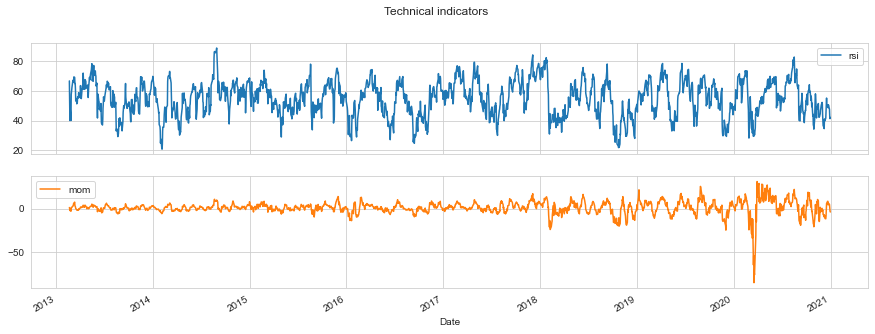

In [11]:
stock_name = 'hd'.upper()
industry = 'Consumer cyclical'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1538.00, duration: 0:00:00.268060
episode: 2/2000, episode end value: 1499.66, duration: 0:00:00.304071
episode: 3/2000, episode end value: 1506.70, duration: 0:00:00.302065
episode: 4/2000, episode end value: 1530.38, duration: 0:00:00.317070
episode: 5/2000, episode end value: 1535.67, duration: 0:00:00.277062
episode: 6/2000, episode end value: 1514.03, duration: 0:00:00.283064
episode: 7/2000, episode end value: 1515.57, duration: 0:00:00.284068
episode: 8/2000, episode end value: 1519.84, duration: 0:00:00.258057
episode: 9/2000, episode end value: 1519.97, duration: 0:00:00.259060
episode: 10/2000, episode end value: 1520.55, duration: 0:00:00.269061
episode: 11/2000, episode end value: 1516.00, duration: 0:00:00.256062
episode: 12/2000, episode end value: 1498.62, duration: 0:00:00.273059
episode: 13/2000, episode end value: 1509.26, duration: 0:00:00.269057
episode: 14/2000, episode end value: 1520.27, duration: 0:00:00.271062
episode: 15/200

episode: 117/2000, episode end value: 1510.50, duration: 0:00:00.284065
episode: 118/2000, episode end value: 1521.63, duration: 0:00:00.311067
episode: 119/2000, episode end value: 1497.52, duration: 0:00:00.293067
episode: 120/2000, episode end value: 1518.71, duration: 0:00:00.272062
episode: 121/2000, episode end value: 1496.19, duration: 0:00:00.301067
episode: 122/2000, episode end value: 1505.80, duration: 0:00:00.274066
episode: 123/2000, episode end value: 1489.69, duration: 0:00:00.336072
episode: 124/2000, episode end value: 1510.28, duration: 0:00:00.304071
episode: 125/2000, episode end value: 1514.14, duration: 0:00:00.329074
episode: 126/2000, episode end value: 1517.58, duration: 0:00:00.333075
episode: 127/2000, episode end value: 1520.62, duration: 0:00:00.291066
episode: 128/2000, episode end value: 1491.23, duration: 0:00:00.301068
episode: 129/2000, episode end value: 1516.67, duration: 0:00:00.279063
episode: 130/2000, episode end value: 1511.31, duration: 0:00:00

episode: 231/2000, episode end value: 1523.12, duration: 0:00:00.393090
episode: 232/2000, episode end value: 1494.75, duration: 0:00:00.410097
episode: 233/2000, episode end value: 1524.10, duration: 0:00:00.375089
episode: 234/2000, episode end value: 1503.32, duration: 0:00:00.438099
episode: 235/2000, episode end value: 1508.85, duration: 0:00:00.406095
episode: 236/2000, episode end value: 1482.95, duration: 0:00:00.357076
episode: 237/2000, episode end value: 1512.60, duration: 0:00:00.317072
episode: 238/2000, episode end value: 1492.06, duration: 0:00:00.414096
episode: 239/2000, episode end value: 1520.38, duration: 0:00:00.387090
episode: 240/2000, episode end value: 1514.74, duration: 0:00:00.399088
episode: 241/2000, episode end value: 1505.78, duration: 0:00:00.377084
episode: 242/2000, episode end value: 1509.82, duration: 0:00:00.459110
episode: 243/2000, episode end value: 1510.78, duration: 0:00:00.408089
episode: 244/2000, episode end value: 1495.45, duration: 0:00:00

episode: 345/2000, episode end value: 1521.04, duration: 0:00:00.364086
episode: 346/2000, episode end value: 1521.82, duration: 0:00:00.403090
episode: 347/2000, episode end value: 1498.04, duration: 0:00:00.399089
episode: 348/2000, episode end value: 1490.23, duration: 0:00:00.378086
episode: 349/2000, episode end value: 1512.54, duration: 0:00:00.378085
episode: 350/2000, episode end value: 1524.78, duration: 0:00:00.390086
episode: 351/2000, episode end value: 1520.18, duration: 0:00:00.467104
episode: 352/2000, episode end value: 1495.86, duration: 0:00:00.461104
episode: 353/2000, episode end value: 1504.36, duration: 0:00:00.386086
episode: 354/2000, episode end value: 1524.34, duration: 0:00:00.425094
episode: 355/2000, episode end value: 1506.82, duration: 0:00:00.378085
episode: 356/2000, episode end value: 1514.64, duration: 0:00:00.376086
episode: 357/2000, episode end value: 1502.81, duration: 0:00:00.404092
episode: 358/2000, episode end value: 1506.17, duration: 0:00:00

episode: 459/2000, episode end value: 1523.75, duration: 0:00:00.441101
episode: 460/2000, episode end value: 1523.81, duration: 0:00:00.445100
episode: 461/2000, episode end value: 1524.13, duration: 0:00:00.438100
episode: 462/2000, episode end value: 1498.59, duration: 0:00:00.400090
episode: 463/2000, episode end value: 1517.65, duration: 0:00:00.375086
episode: 464/2000, episode end value: 1521.24, duration: 0:00:00.441099
episode: 465/2000, episode end value: 1526.38, duration: 0:00:00.361082
episode: 466/2000, episode end value: 1519.89, duration: 0:00:00.419095
episode: 467/2000, episode end value: 1502.14, duration: 0:00:00.468104
episode: 468/2000, episode end value: 1513.75, duration: 0:00:00.380083
episode: 469/2000, episode end value: 1514.35, duration: 0:00:00.452103
episode: 470/2000, episode end value: 1496.98, duration: 0:00:00.463102
episode: 471/2000, episode end value: 1519.49, duration: 0:00:00.419095
episode: 472/2000, episode end value: 1514.32, duration: 0:00:00

episode: 573/2000, episode end value: 1512.05, duration: 0:00:00.418096
episode: 574/2000, episode end value: 1521.53, duration: 0:00:00.426093
episode: 575/2000, episode end value: 1515.02, duration: 0:00:00.376087
episode: 576/2000, episode end value: 1500.63, duration: 0:00:00.404091
episode: 577/2000, episode end value: 1502.59, duration: 0:00:00.361079
episode: 578/2000, episode end value: 1513.36, duration: 0:00:00.438098
episode: 579/2000, episode end value: 1517.64, duration: 0:00:00.521117
episode: 580/2000, episode end value: 1526.71, duration: 0:00:00.498114
episode: 581/2000, episode end value: 1496.28, duration: 0:00:00.476106
episode: 582/2000, episode end value: 1510.83, duration: 0:00:00.428097
episode: 583/2000, episode end value: 1513.34, duration: 0:00:00.360081
episode: 584/2000, episode end value: 1514.94, duration: 0:00:00.412091
episode: 585/2000, episode end value: 1514.35, duration: 0:00:00.377085
episode: 586/2000, episode end value: 1513.86, duration: 0:00:00

episode: 687/2000, episode end value: 1498.26, duration: 0:00:00.465104
episode: 688/2000, episode end value: 1503.28, duration: 0:00:00.458103
episode: 689/2000, episode end value: 1512.69, duration: 0:00:00.438100
episode: 690/2000, episode end value: 1507.63, duration: 0:00:00.439104
episode: 691/2000, episode end value: 1505.39, duration: 0:00:00.405087
episode: 692/2000, episode end value: 1523.65, duration: 0:00:00.416095
episode: 693/2000, episode end value: 1515.09, duration: 0:00:00.446101
episode: 694/2000, episode end value: 1522.79, duration: 0:00:00.508118
episode: 695/2000, episode end value: 1506.95, duration: 0:00:00.478105
episode: 696/2000, episode end value: 1509.43, duration: 0:00:00.394088
episode: 697/2000, episode end value: 1515.32, duration: 0:00:00.412095
episode: 698/2000, episode end value: 1516.70, duration: 0:00:00.427091
episode: 699/2000, episode end value: 1510.98, duration: 0:00:00.500112
episode: 700/2000, episode end value: 1525.67, duration: 0:00:00

episode: 801/2000, episode end value: 1505.88, duration: 0:00:00.426095
episode: 802/2000, episode end value: 1493.56, duration: 0:00:00.459109
episode: 803/2000, episode end value: 1510.29, duration: 0:00:00.431098
episode: 804/2000, episode end value: 1515.98, duration: 0:00:00.404085
episode: 805/2000, episode end value: 1499.26, duration: 0:00:00.429096
episode: 806/2000, episode end value: 1514.40, duration: 0:00:00.391091
episode: 807/2000, episode end value: 1510.29, duration: 0:00:00.450099
episode: 808/2000, episode end value: 1517.00, duration: 0:00:00.419098
episode: 809/2000, episode end value: 1500.07, duration: 0:00:00.460100
episode: 810/2000, episode end value: 1514.31, duration: 0:00:00.374086
episode: 811/2000, episode end value: 1506.06, duration: 0:00:00.402093
episode: 812/2000, episode end value: 1527.84, duration: 0:00:00.437100
episode: 813/2000, episode end value: 1505.10, duration: 0:00:00.429093
episode: 814/2000, episode end value: 1508.35, duration: 0:00:00

episode: 915/2000, episode end value: 1529.21, duration: 0:00:00.391087
episode: 916/2000, episode end value: 1526.92, duration: 0:00:00.408090
episode: 917/2000, episode end value: 1510.11, duration: 0:00:00.379084
episode: 918/2000, episode end value: 1497.45, duration: 0:00:00.414094
episode: 919/2000, episode end value: 1499.88, duration: 0:00:00.377084
episode: 920/2000, episode end value: 1519.18, duration: 0:00:00.436098
episode: 921/2000, episode end value: 1507.18, duration: 0:00:00.356082
episode: 922/2000, episode end value: 1514.73, duration: 0:00:00.405090
episode: 923/2000, episode end value: 1498.28, duration: 0:00:00.423095
episode: 924/2000, episode end value: 1526.16, duration: 0:00:00.414095
episode: 925/2000, episode end value: 1524.10, duration: 0:00:00.443103
episode: 926/2000, episode end value: 1518.70, duration: 0:00:00.364083
episode: 927/2000, episode end value: 1501.48, duration: 0:00:00.380084
episode: 928/2000, episode end value: 1518.06, duration: 0:00:00

episode: 1029/2000, episode end value: 1512.45, duration: 0:00:00.403091
episode: 1030/2000, episode end value: 1498.70, duration: 0:00:00.408091
episode: 1031/2000, episode end value: 1517.86, duration: 0:00:00.363085
episode: 1032/2000, episode end value: 1497.31, duration: 0:00:00.428091
episode: 1033/2000, episode end value: 1518.28, duration: 0:00:00.373085
episode: 1034/2000, episode end value: 1503.10, duration: 0:00:00.459102
episode: 1035/2000, episode end value: 1514.44, duration: 0:00:00.419095
episode: 1036/2000, episode end value: 1510.43, duration: 0:00:00.417096
episode: 1037/2000, episode end value: 1514.99, duration: 0:00:00.418092
episode: 1038/2000, episode end value: 1493.61, duration: 0:00:00.400088
episode: 1039/2000, episode end value: 1498.61, duration: 0:00:00.401090
episode: 1040/2000, episode end value: 1524.48, duration: 0:00:00.464106
episode: 1041/2000, episode end value: 1515.07, duration: 0:00:00.320071
episode: 1042/2000, episode end value: 1516.94, dur

episode: 1142/2000, episode end value: 1505.08, duration: 0:00:00.365081
episode: 1143/2000, episode end value: 1501.66, duration: 0:00:00.332075
episode: 1144/2000, episode end value: 1509.56, duration: 0:00:00.404091
episode: 1145/2000, episode end value: 1515.39, duration: 0:00:00.402088
episode: 1146/2000, episode end value: 1504.83, duration: 0:00:00.412094
episode: 1147/2000, episode end value: 1501.29, duration: 0:00:00.458105
episode: 1148/2000, episode end value: 1501.23, duration: 0:00:00.391090
episode: 1149/2000, episode end value: 1510.78, duration: 0:00:00.409096
episode: 1150/2000, episode end value: 1508.27, duration: 0:00:00.422091
episode: 1151/2000, episode end value: 1511.64, duration: 0:00:00.348085
episode: 1152/2000, episode end value: 1520.07, duration: 0:00:00.357079
episode: 1153/2000, episode end value: 1512.73, duration: 0:00:00.373082
episode: 1154/2000, episode end value: 1510.31, duration: 0:00:00.393093
episode: 1155/2000, episode end value: 1513.44, dur

episode: 1255/2000, episode end value: 1509.84, duration: 0:00:00.498111
episode: 1256/2000, episode end value: 1514.16, duration: 0:00:00.462104
episode: 1257/2000, episode end value: 1498.82, duration: 0:00:00.439098
episode: 1258/2000, episode end value: 1510.18, duration: 0:00:00.381088
episode: 1259/2000, episode end value: 1516.64, duration: 0:00:00.416090
episode: 1260/2000, episode end value: 1512.30, duration: 0:00:00.417097
episode: 1261/2000, episode end value: 1492.81, duration: 0:00:00.467103
episode: 1262/2000, episode end value: 1511.47, duration: 0:00:00.451101
episode: 1263/2000, episode end value: 1496.29, duration: 0:00:00.386089
episode: 1264/2000, episode end value: 1517.70, duration: 0:00:00.466101
episode: 1265/2000, episode end value: 1513.25, duration: 0:00:00.374086
episode: 1266/2000, episode end value: 1512.20, duration: 0:00:00.427099
episode: 1267/2000, episode end value: 1513.74, duration: 0:00:00.373080
episode: 1268/2000, episode end value: 1522.22, dur

episode: 1368/2000, episode end value: 1510.58, duration: 0:00:00.446101
episode: 1369/2000, episode end value: 1506.58, duration: 0:00:00.369084
episode: 1370/2000, episode end value: 1510.32, duration: 0:00:00.421094
episode: 1371/2000, episode end value: 1507.13, duration: 0:00:00.483110
episode: 1372/2000, episode end value: 1524.93, duration: 0:00:00.374084
episode: 1373/2000, episode end value: 1516.65, duration: 0:00:00.421098
episode: 1374/2000, episode end value: 1516.95, duration: 0:00:00.399089
episode: 1375/2000, episode end value: 1514.04, duration: 0:00:00.427096
episode: 1376/2000, episode end value: 1501.84, duration: 0:00:00.368082
episode: 1377/2000, episode end value: 1512.91, duration: 0:00:00.366084
episode: 1378/2000, episode end value: 1508.75, duration: 0:00:00.402087
episode: 1379/2000, episode end value: 1517.13, duration: 0:00:00.428097
episode: 1380/2000, episode end value: 1518.39, duration: 0:00:00.418096
episode: 1381/2000, episode end value: 1523.66, dur

episode: 1481/2000, episode end value: 1513.16, duration: 0:00:00.415096
episode: 1482/2000, episode end value: 1499.68, duration: 0:00:00.412091
episode: 1483/2000, episode end value: 1515.16, duration: 0:00:00.372089
episode: 1484/2000, episode end value: 1518.55, duration: 0:00:00.387084
episode: 1485/2000, episode end value: 1509.60, duration: 0:00:00.367087
episode: 1486/2000, episode end value: 1522.69, duration: 0:00:00.483101
episode: 1487/2000, episode end value: 1518.47, duration: 0:00:00.449104
episode: 1488/2000, episode end value: 1510.58, duration: 0:00:00.495110
episode: 1489/2000, episode end value: 1511.48, duration: 0:00:00.477112
episode: 1490/2000, episode end value: 1498.90, duration: 0:00:00.477100
episode: 1491/2000, episode end value: 1516.38, duration: 0:00:00.399092
episode: 1492/2000, episode end value: 1497.51, duration: 0:00:00.404092
episode: 1493/2000, episode end value: 1495.56, duration: 0:00:00.365080
episode: 1494/2000, episode end value: 1500.21, dur

episode: 1594/2000, episode end value: 1503.25, duration: 0:00:00.378086
episode: 1595/2000, episode end value: 1499.00, duration: 0:00:00.392086
episode: 1596/2000, episode end value: 1505.72, duration: 0:00:00.350080
episode: 1597/2000, episode end value: 1508.73, duration: 0:00:00.368083
episode: 1598/2000, episode end value: 1513.44, duration: 0:00:00.403094
episode: 1599/2000, episode end value: 1513.16, duration: 0:00:00.363078
episode: 1600/2000, episode end value: 1498.94, duration: 0:00:00.378086
episode: 1601/2000, episode end value: 1512.25, duration: 0:00:00.341078
episode: 1602/2000, episode end value: 1509.98, duration: 0:00:00.445102
episode: 1603/2000, episode end value: 1510.63, duration: 0:00:00.326070
episode: 1604/2000, episode end value: 1527.66, duration: 0:00:00.361082
episode: 1605/2000, episode end value: 1519.82, duration: 0:00:00.413093
episode: 1606/2000, episode end value: 1516.50, duration: 0:00:00.378084
episode: 1607/2000, episode end value: 1499.47, dur

episode: 1707/2000, episode end value: 1514.75, duration: 0:00:00.313066
episode: 1708/2000, episode end value: 1514.49, duration: 0:00:00.406096
episode: 1709/2000, episode end value: 1494.35, duration: 0:00:00.373083
episode: 1710/2000, episode end value: 1512.58, duration: 0:00:00.409095
episode: 1711/2000, episode end value: 1523.05, duration: 0:00:00.361083
episode: 1712/2000, episode end value: 1523.82, duration: 0:00:00.351079
episode: 1713/2000, episode end value: 1517.89, duration: 0:00:00.400082
episode: 1714/2000, episode end value: 1514.23, duration: 0:00:00.357079
episode: 1715/2000, episode end value: 1524.08, duration: 0:00:00.391094
episode: 1716/2000, episode end value: 1521.02, duration: 0:00:00.400089
episode: 1717/2000, episode end value: 1515.51, duration: 0:00:00.367081
episode: 1718/2000, episode end value: 1516.69, duration: 0:00:00.346077
episode: 1719/2000, episode end value: 1513.86, duration: 0:00:00.366086
episode: 1720/2000, episode end value: 1513.03, dur

episode: 1820/2000, episode end value: 1496.95, duration: 0:00:00.405092
episode: 1821/2000, episode end value: 1504.39, duration: 0:00:00.366083
episode: 1822/2000, episode end value: 1517.34, duration: 0:00:00.394087
episode: 1823/2000, episode end value: 1516.10, duration: 0:00:00.408094
episode: 1824/2000, episode end value: 1516.28, duration: 0:00:00.464105
episode: 1825/2000, episode end value: 1499.02, duration: 0:00:00.381089
episode: 1826/2000, episode end value: 1506.59, duration: 0:00:00.321067
episode: 1827/2000, episode end value: 1491.89, duration: 0:00:00.366083
episode: 1828/2000, episode end value: 1502.19, duration: 0:00:00.320072
episode: 1829/2000, episode end value: 1504.08, duration: 0:00:00.346078
episode: 1830/2000, episode end value: 1512.98, duration: 0:00:00.398089
episode: 1831/2000, episode end value: 1510.67, duration: 0:00:00.374086
episode: 1832/2000, episode end value: 1524.37, duration: 0:00:00.403093
episode: 1833/2000, episode end value: 1499.00, dur

episode: 1933/2000, episode end value: 1516.41, duration: 0:00:00.320071
episode: 1934/2000, episode end value: 1517.30, duration: 0:00:00.306069
episode: 1935/2000, episode end value: 1525.87, duration: 0:00:00.321075
episode: 1936/2000, episode end value: 1515.47, duration: 0:00:00.339079
episode: 1937/2000, episode end value: 1515.24, duration: 0:00:00.321069
episode: 1938/2000, episode end value: 1517.20, duration: 0:00:00.335075
episode: 1939/2000, episode end value: 1494.40, duration: 0:00:00.325078
episode: 1940/2000, episode end value: 1522.95, duration: 0:00:00.349075
episode: 1941/2000, episode end value: 1513.52, duration: 0:00:00.308067
episode: 1942/2000, episode end value: 1513.17, duration: 0:00:00.336073
episode: 1943/2000, episode end value: 1515.17, duration: 0:00:00.314073
episode: 1944/2000, episode end value: 1515.44, duration: 0:00:00.317069
episode: 1945/2000, episode end value: 1507.80, duration: 0:00:00.287065
episode: 1946/2000, episode end value: 1496.52, dur

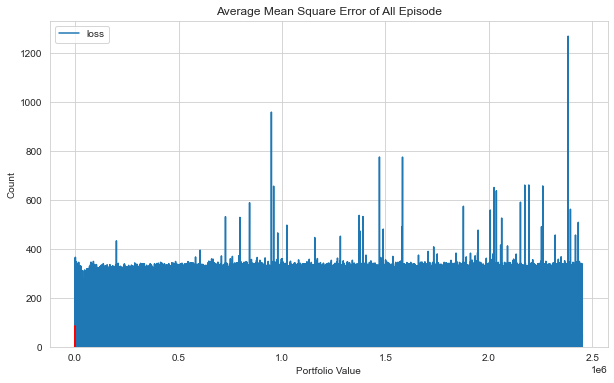

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

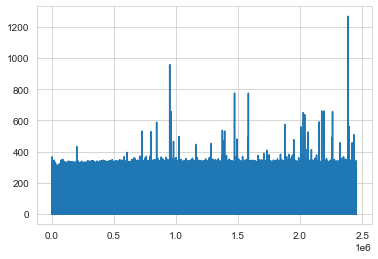

In [5]:
plt.plot(agent.model.losses)

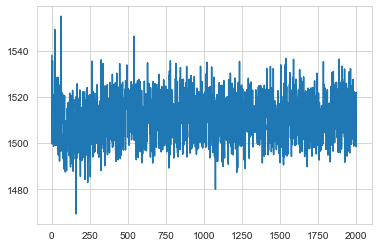

In [6]:
plt.plot(portfolio_value)

episode end value: 1251.61, duration: 0:00:00.101040
Sell: 398 times, Buy: 351 times


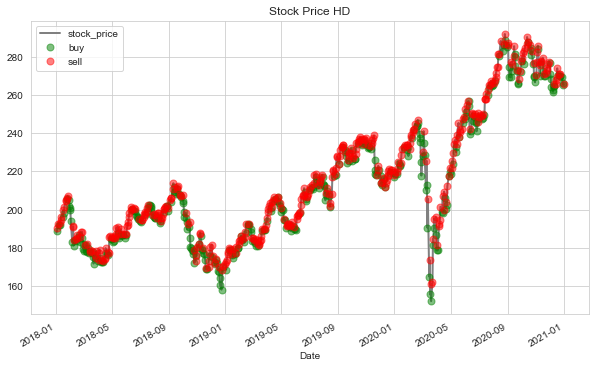

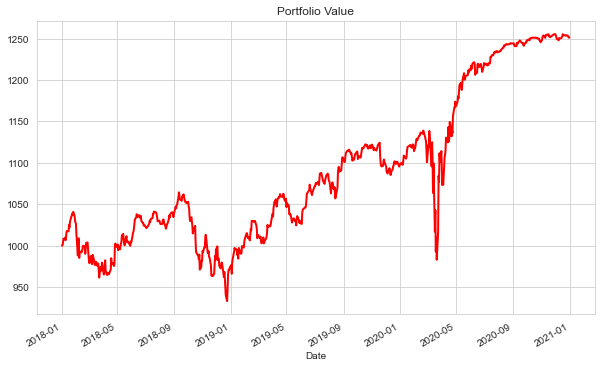

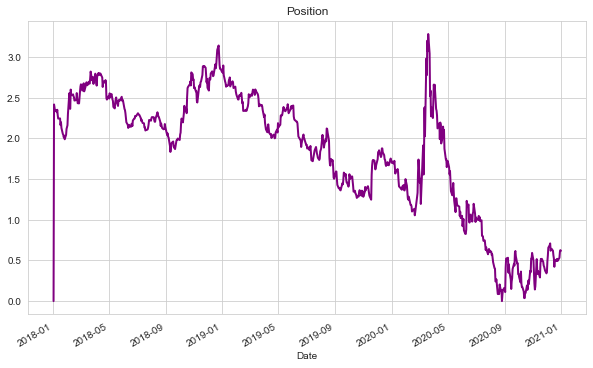

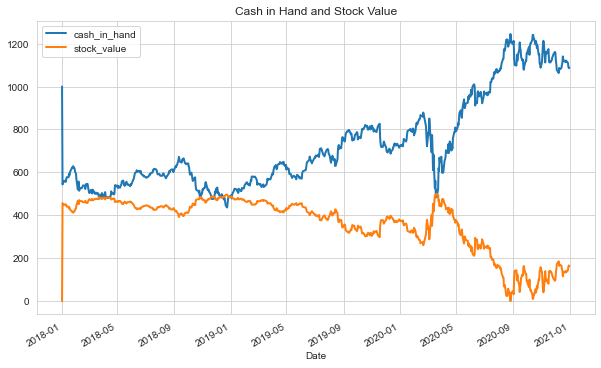

In [12]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [13]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: HD
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 7.77 %
Volatility: 0.1191
shape ratio: 0.5598
Maximun drawdown: -13.71 %
Calmar ratio: 0.5665
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): 12.20 %
Volatility (benchmark): 0.3026
shape ratio: 0.3670
Maximun drawdown: -38.41 %
Calmar ratio (benchmark): 0.3178


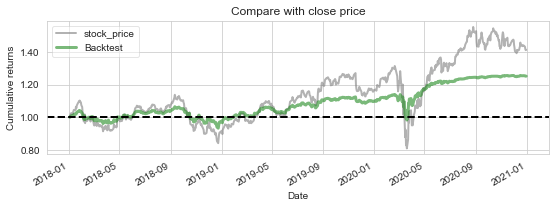

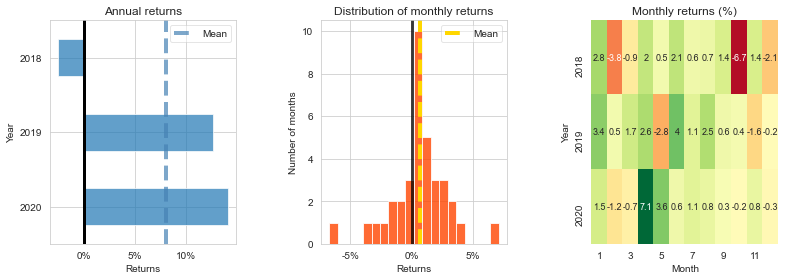

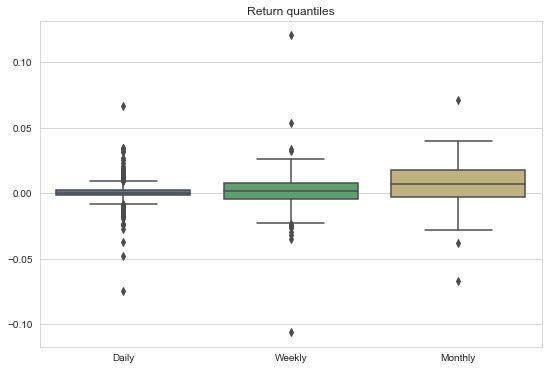

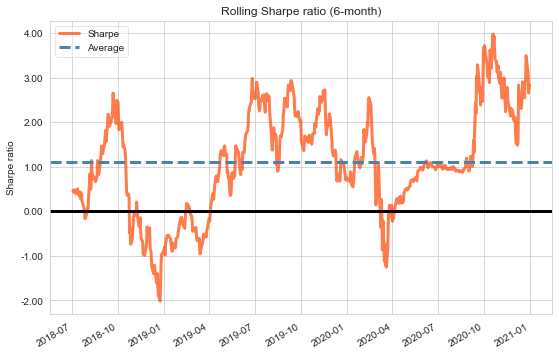

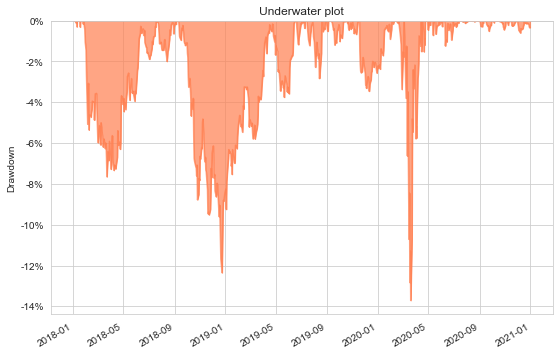

In [14]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')